## Principal Component Analysis (PCA) to an Autoencoder

This notebook shows how principal component analysis (PCA) is being used to reduce the the number of input components (28*28=784) of the MNIST dataset and how the reduced dataset is being used to train an autoencoder. Later, the reconstructed output (size is 154) is converted back to images' original size (28*28 = 784) using the PCA's inverse transformation function. At the bottom, the first 10 original and the reconstructed images of the test dataset are shown.

### Loading the MNIST dataset

From Wikipedia, the free encyclopedia (https://en.wikipedia.org/wiki/MNIST_database)

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

THE MNIST DATABASE of handwritten digits - http://yann.lecun.com/exdb/mnist/

### Loading the MNIST dataset

In [304]:
from keras.datasets import mnist #importing the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print "x_train shape = ", x_train.shape, "y_train shape = ", y_train.shape
print "x_test shape = ", x_test.shape, "y_test shape = ", y_test.shape

x_train shape =  (60000, 28, 28) y_train shape =  (60000,)
x_test shape =  (10000, 28, 28) y_test shape =  (10000,)


In [305]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

### Reshaping inputs

In [306]:
INPUT_DIM = 784 #28 by 28

x_train_reshape = x_train.reshape(60000, INPUT_DIM)
x_test_reshape = x_test.reshape(10000, INPUT_DIM)
print x_train.shape, "=>", x_train_reshape.shape
print x_test.shape,  "=>", x_test_reshape.shape

(60000, 28, 28) => (60000, 784)
(10000, 28, 28) => (10000, 784)


### Normalizing the inputs

In [307]:
x_train_reshape /= 255
x_test_reshape  /= 255

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# # Fit on training set only.
# scaler.fit(x_train_reshape)

# # Apply transform to both the training set and the test set.
# x_train_reshape = scaler.transform(x_train_reshape)
# x_test_reshape = scaler.transform(x_test_reshape)

### Import and apply PCA

In [308]:
from sklearn.decomposition import PCA
#Make an instance of the model
pca = PCA(0.95)  #95% of the variance amounts to 154 principal components
pca.fit(x_train_reshape)
pca_n_components = pca.n_components_
print "Number of PCA components = ", pca_n_components

Number of PCA components =  154


PCA reduces original number of components (28*28 = 784)  to 154.

### Apply the mapping (transform) to both the training set and the test set.

In [309]:
x_train_pca_reduced = pca.transform(x_train_reshape)
x_test_pca_reduced = pca.transform(x_test_reshape)
print "Dimensions of x_train_pca_reduced = ", x_train_pca_reduced.shape
print "Dimensions of x_test_pca_reduced = ", x_test_pca_reduced.shape

Dimensions of x_train_pca_reduced =  (60000, 154)
Dimensions of x_test_pca_reduced =  (10000, 154)


### Building the Autoencoder model

In [310]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

ENCODING_DIM = 32
autoencoder = Sequential()
autoencoder.add(Dense(ENCODING_DIM, activation='relu', input_shape=(pca_n_components,)))
# autoencoder.add(Dropout(0.5))
# autoencoder.add(Dense(ENCODING_DIM, activation='relu'))
# autoencoder.add(Dropout(0.5))
autoencoder.add(Dense(pca_n_components, activation='sigmoid'))
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                4960      
_________________________________________________________________
dense_49 (Dense)             (None, 154)               5082      
Total params: 10,042
Trainable params: 10,042
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [311]:
autoencoder.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

### Fitting the Autoencoder

In [312]:
autoencoder_history = autoencoder.fit(x=x_train_pca_reduced, y=x_train_pca_reduced,
                                     epochs=100, batch_size=256,
                                     shuffle=True,
                                     validation_data=(x_test_pca_reduced, x_test_pca_reduced),
                                     verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.3601 - acc: 0.4024 - val_loss: 0.2820 - val_acc: 0.6039
Epoch 2/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2671 - acc: 0.6648 - val_loss: 0.2562 - val_acc: 0.7223
Epoch 3/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2509 - acc: 0.7281 - val_loss: 0.2465 - val_acc: 0.7519
Epoch 4/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2441 - acc: 0.7464 - val_loss: 0.2417 - val_acc: 0.7622
Epoch 5/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2400 - acc: 0.7559 - val_loss: 0.2383 - val_acc: 0.7705
Epoch 6/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2371 - acc: 0.7649 - val_loss: 0.2358 - val_acc: 0.7826
Epoch 7/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2350 - acc: 0.7740 - val_loss: 0.2339 - 

60000/60000 [==============================] - 1s 16us/step - loss: 0.2263 - acc: 0.8579 - val_loss: 0.2261 - val_acc: 0.8628
Epoch 60/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2263 - acc: 0.8580 - val_loss: 0.2261 - val_acc: 0.8648
Epoch 61/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2263 - acc: 0.8574 - val_loss: 0.2261 - val_acc: 0.8646
Epoch 62/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2263 - acc: 0.8579 - val_loss: 0.2261 - val_acc: 0.8621
Epoch 63/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2263 - acc: 0.8576 - val_loss: 0.2261 - val_acc: 0.8642
Epoch 64/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2263 - acc: 0.8574 - val_loss: 0.2261 - val_acc: 0.8641
Epoch 65/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2263 - acc: 0.8580 - val_loss: 0.2261 - val_acc: 0.8636
Epoch 66/100
60000/60000 [==============

### Evaluating the model

In [313]:
score = autoencoder.evaluate(x_test_pca_reduced, x_test_pca_reduced, verbose=2) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

('Test score:', 0.22580495624542235)
('Test accuracy:', 0.8624)


### Plotting the model performances

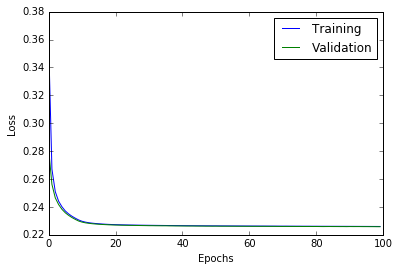

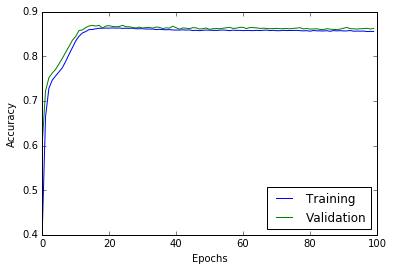

In [314]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(autoencoder_history)# use Matplotlib (don't ask)

### Output of the autoencoder for the test dataset

In [315]:
autoencoder_output = autoencoder.predict(x_test_pca_reduced)
print "Shape of reconstructed test input = ", autoencoder_output.shape

Shape of reconstructed test input =  (10000, 154)


### Reconstructing the original image

Reconstructing the original images of the test dataset using the PCA's 'inverse_transform' function. 

In [316]:
reconstructed_imgs_from_pca = pca.inverse_transform(x_test_pca_reduced)
reconstructed_imgs_from_autoencoder = pca.inverse_transform(autoencoder_output)
print reconstructed_imgs_from_pca.shape
print reconstructed_imgs_from_autoencoder.shape

(10000, 784)
(10000, 784)


Original images


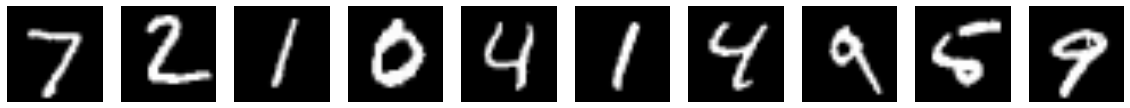

Images constructed from PCA - applying the inverse_transform function


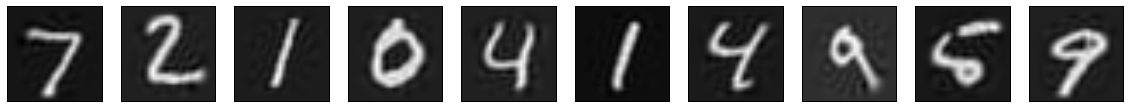

Reconstructed images from the autoencoder - applying the inverse_transform function for the autoencoder output


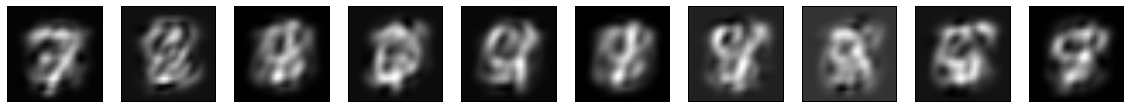

In [317]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display

print "Original images"
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print "Images constructed from PCA - applying the inverse_transform function"
plt.figure(figsize=(20, 4))
for i in range(n):    
    # display reconstruction  - pca
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs_from_pca[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print "Reconstructed images from the autoencoder - applying the inverse_transform function for the autoencoder output"
plt.figure(figsize=(20, 4))
for i in range(n):    
    # display reconstruction  - autoencoder
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs_from_autoencoder[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    
plt.show()